In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.cluster import KMeans

Input Data and Shape
(3000, 2)


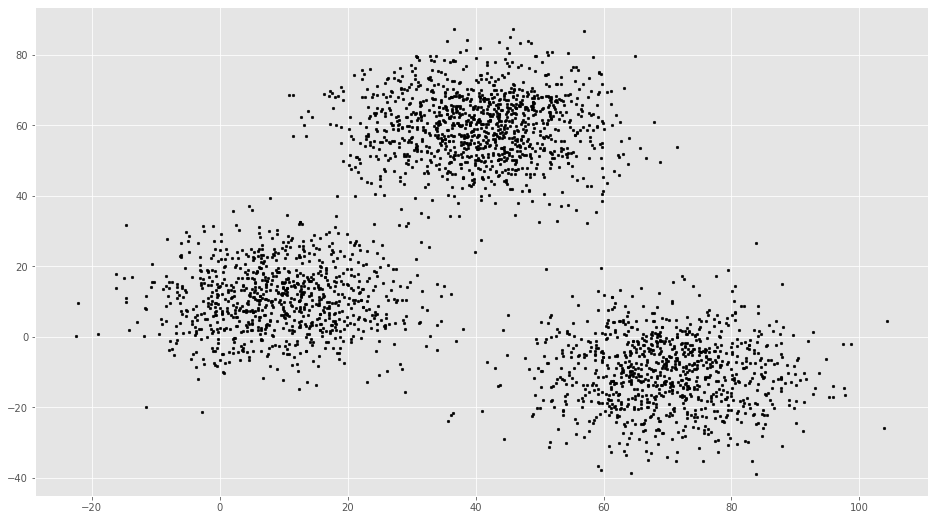

In [20]:
# Importing the dataset
data = pd.read_csv('dummy.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

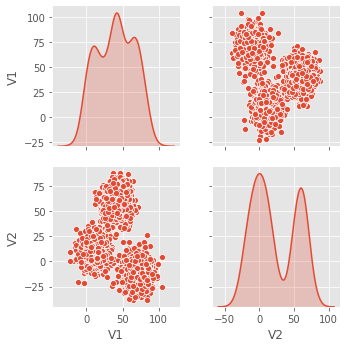

In [21]:
import seaborn as sns
sns.pairplot(data, diag_kind = 'kde' )

In [22]:
# Let us check optimal number of clusters-

cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(X)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia (SSE - loss function)

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.354185e+05
4,5,4.691047e+05
5,6,4.079257e+05
6,7,3.611031e+05
7,8,3.168898e+05
8,9,2.747361e+05


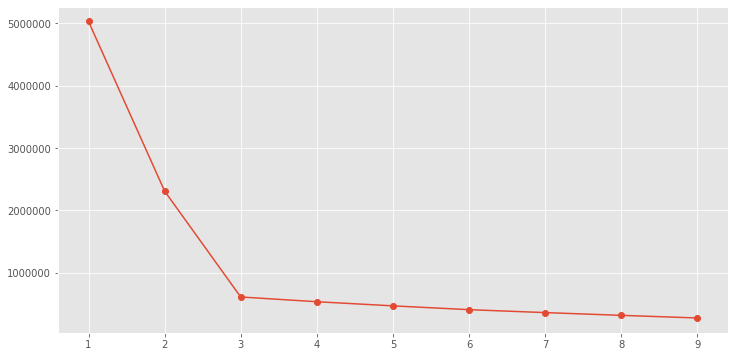

In [23]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [24]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3) #Since the loss function starts to depriciate gradually after 3 

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print(centroids)

Centroid values
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


In [25]:
colnames = ["col1", "col2"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [26]:
#Added the Cluster Number values to the Dataset
X_df.head(2)

,col1,col2,group
0,2.072345,-3.241693,2
1,17.936710,15.784810,2


In [27]:
#Plotting the datapoints with clusters in different colors
for i in range(5):
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

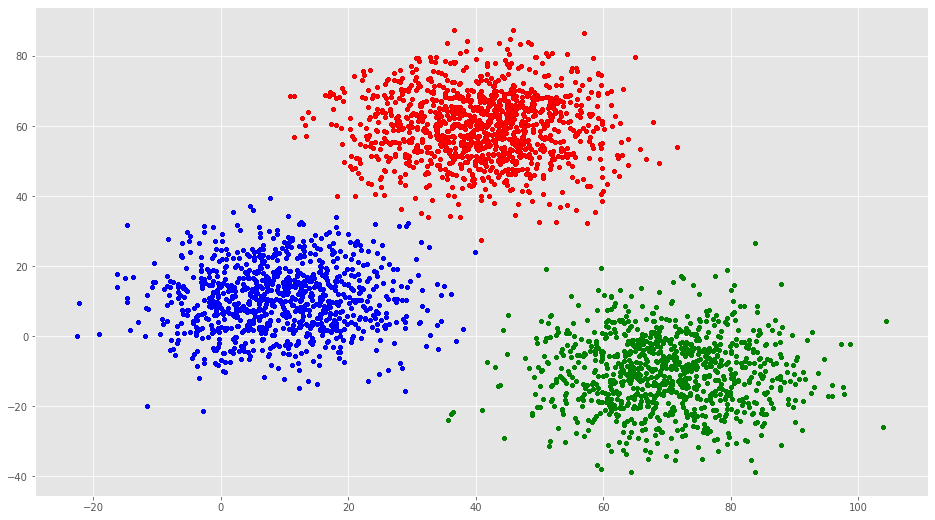

In [28]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
